In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

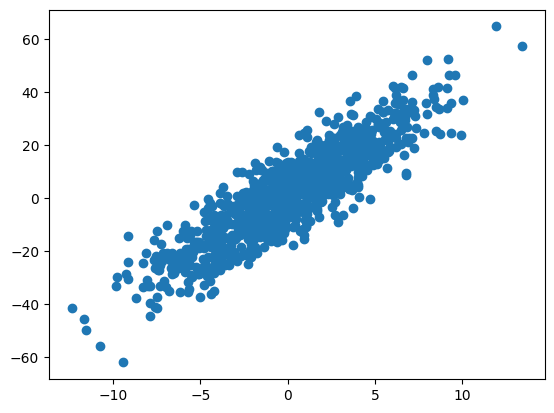

In [135]:


# generate data
# y = 3x + 2

def genData(W, b, cnt):
    X = torch.normal(0, 4, (cnt, len(W)))
    y = torch.matmul(X, W) + b
    y += torch.normal(0, 0.1, y.shape)
    return X, y

feature, label = genData(torch.tensor([-2.0, 4.0]), 2.0, 1000)

d2l.plt.scatter(feature[:, 1].detach(), label.detach())

In [24]:
def batch_get(feature, label, batchSize):
    lenD = len(feature)
    indces = list(range(lenD))
    random.shuffle(indces)
    for i in range(0, lenD, batchSize):
        lastI = min(i+batchSize, lenD)
        batchIndces = torch.tensor(indces[i: lastI])
        yield feature[batchIndces], label[batchIndces]

print(next(batch_get(feature, label, 10)))

(tensor([[ 3.8782, -2.8994],
        [ 9.5422,  2.0172],
        [ 4.8623, -6.6601],
        [-3.0275,  7.8126],
        [ 4.8826,  0.0684],
        [ 8.4254, -0.6219],
        [ 1.8926,  0.5585],
        [ 4.5952,  2.4218],
        [ 2.2936,  3.7380],
        [ 0.9246,  7.8557]]), tensor([  2.0216,  38.7137, -10.0456,  24.2072,  16.8441,  24.7846,   9.9980,
         25.7085,  23.9188,  36.1470]))


In [62]:
print(bias)
print(weight)

tensor([0.], requires_grad=True)
tensor([[ 0.1675],
        [-0.8441]], requires_grad=True)


In [14]:
# your model
def liner(X, W, b):
    return torch.matmul(X, W) + b

In [39]:
# your loss function
# mse: (y-y_hat)^2 / 2
def mse(y, y_hat):
    return (y.reshape(y_hat.shape) - y_hat) ** 2 / 2

In [69]:
# your optimize function
# small batch gradient decent
def sgd(params, lr, batchSize):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batchSize
            param.grad.zero_()

In [191]:
# initial parameter
weight = torch.rand((feature[0].shape[0], 1), requires_grad=True)
bias = torch.zeros(1, requires_grad=True)

In [214]:
# train
#hyper parameters
batchSize = 10
lr = 0.03
epoch = 5
net = liner

trainl = mse(l, net(f, weight, bias))
print(f'epoch {epochCnt+1}, loss: {trainl.mean()}')
for epochCnt in range(epoch):
    for f, l in batch_get(feature, label, batchSize):
        lHat = net(f, weight, bias)
        ferr = mse(l, lHat)
        ferr.sum().backward()
        sgd([weight, bias], lr, batchSize)
    with torch.no_grad():
        trainl = mse(l, net(f, weight, bias))
        print(f'epoch {epochCnt+1}, loss: {trainl.mean()}')

epoch 5, loss: 0.0030526053160429
epoch 1, loss: 0.0021067983470857143
epoch 2, loss: 0.0020612445659935474
epoch 3, loss: 0.004555599298328161
epoch 4, loss: 0.004672779701650143
epoch 5, loss: 0.00519428588449955
